In [1]:
import pandas as pd
import datetime


In [2]:
#to load the data back in use
df_full = pd.read_pickle('original_turnstile_df.pkl')

In [3]:
#create a new column with using the date & time columns,
# then turning it into a datetime object
df_full['DateTime'] = pd.to_datetime(df_full.DATE.astype(str) + " " + df_full.TIME.astype(str))

In [4]:
#remove whitespace from the column titles
df_full.columns = [column.strip() for column in df_full.columns]
df_full.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DateTime'],
      dtype='object')

In [8]:
#check for null vals
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628297 entries, 0 to 209660
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   C/A       628297 non-null  object        
 1   UNIT      628297 non-null  object        
 2   SCP       628297 non-null  object        
 3   STATION   628297 non-null  object        
 4   LINENAME  628297 non-null  object        
 5   DIVISION  628297 non-null  object        
 6   DATE      628297 non-null  object        
 7   TIME      628297 non-null  object        
 8   DESC      628297 non-null  object        
 9   ENTRIES   628297 non-null  int64         
 10  EXITS     628297 non-null  int64         
 11  DateTime  628297 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 62.3+ MB


In [5]:
#grouping by turnstiles locations and summing entries/exits by date
# note that SCP is the only location specific column that changes
turnstiles_df = df_full.groupby(['C/A', 'UNIT', 'STATION', 'SCP', 'DATE' ]).sum().reset_index()


In [6]:
turnstiles_df.head(1000)

,C/A,UNIT,STATION,SCP,DATE,ENTRIES,EXITS
0,A002,R051,59 ST,02-00-00,08/29/2020,44705127,15200485
1,A002,R051,59 ST,02-00-00,08/30/2020,44706856,15201071
2,A002,R051,59 ST,02-00-00,08/31/2020,44708630,15201988
3,A002,R051,59 ST,02-00-00,09/01/2020,44711777,15203251
4,A002,R051,59 ST,02-00-00,09/02/2020,44714663,15204492
...,...,...,...,...,...,...,...
995,A013,R081,49 ST,01-03-01,08/30/2020,38856405,20142398
996,A013,R081,49 ST,01-03-01,08/31/2020,38856903,20142682
997,A013,R081,49 ST,01-03-01,09/01/2020,38857635,20143019
998,A013,R081,49 ST,01-03-01,09/02/2020,38858352,20143364


In [11]:
#check for duplicated values
df_full.groupby(['C/A', 'UNIT', 'STATION', 'SCP', 'DateTime' ])['ENTRIES'].count().reset_index().sort_values('ENTRIES', ascending = False).head(15)


,C/A,UNIT,STATION,SCP,DateTime,ENTRIES
610077,R627,R063,SUTTER AV-RUTLD,00-00-01,2020-09-07 16:00:00,2
499482,R245A,R051,59 ST,01-00-00,2020-09-12 00:00:00,2
320326,N532,R129,BERGEN ST,00-00-01,2020-08-31 17:00:00,2
87,A002,R051,59 ST,02-00-00,2020-09-12 12:00:00,2
320201,N532,R129,BERGEN ST,00-00-00,2020-08-31 17:00:00,2
609953,R627,R063,SUTTER AV-RUTLD,00-00-00,2020-09-08 00:00:00,2
610079,R627,R063,SUTTER AV-RUTLD,00-00-01,2020-09-08 00:00:00,2
609951,R627,R063,SUTTER AV-RUTLD,00-00-00,2020-09-07 16:00:00,2
499484,R245A,R051,59 ST,01-00-00,2020-09-12 08:00:00,2
499483,R245A,R051,59 ST,01-00-00,2020-09-12 04:00:00,2


Looks like 12 entries have duplicate data all coming from 3 stations, check a few of these out.

In [33]:
#Start with sutter-rutld, over 2 turnstiles and two days
sutter_mask = ((df_full["C/A"] == "R627") & 
(df_full["UNIT"] == "R063") & 
((df_full["SCP"] == "00-00-01") |
(df_full["SCP"] == "00-00-00")) & 
(df_full["STATION"] == "SUTTER AV-RUTLD") &
((df_full["DateTime"].dt.date == datetime.datetime(2020, 9, 7).date()) |
(df_full["DateTime"].dt.date == datetime.datetime(2020, 9, 8).date())))
df_full[sutter_mask].head(15)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DateTime
204462,R627,R063,00-00-00,SUTTER AV-RUTLD,3,IRT,09/07/2020,00:00:00,REGULAR,905904,506325,2020-09-07 00:00:00
204463,R627,R063,00-00-00,SUTTER AV-RUTLD,3,IRT,09/07/2020,04:00:00,REGULAR,905909,506332,2020-09-07 04:00:00
204464,R627,R063,00-00-00,SUTTER AV-RUTLD,3,IRT,09/07/2020,08:00:00,REGULAR,906010,506354,2020-09-07 08:00:00
204465,R627,R063,00-00-00,SUTTER AV-RUTLD,3,IRT,09/07/2020,12:00:00,REGULAR,906090,506414,2020-09-07 12:00:00
204466,R627,R063,00-00-00,SUTTER AV-RUTLD,3,IRT,09/07/2020,16:00:00,REGULAR,906197,506501,2020-09-07 16:00:00
204467,R627,R063,00-00-00,SUTTER AV-RUTLD,3,IRT,09/07/2020,16:00:00,RECOVR AUD,930595,912747,2020-09-07 16:00:00
204468,R627,R063,00-00-00,SUTTER AV-RUTLD,3,IRT,09/07/2020,20:00:00,RECOVR AUD,906274,506602,2020-09-07 20:00:00
204469,R627,R063,00-00-00,SUTTER AV-RUTLD,3,IRT,09/08/2020,00:00:00,REGULAR,906307,506657,2020-09-08 00:00:00
204470,R627,R063,00-00-00,SUTTER AV-RUTLD,3,IRT,09/08/2020,00:00:00,RECOVR AUD,930640,912937,2020-09-08 00:00:00
204471,R627,R063,00-00-00,SUTTER AV-RUTLD,3,IRT,09/08/2020,04:00:00,REGULAR,906310,506674,2020-09-08 04:00:00


In [34]:
#bergen st same day, same time (1700), two turnstiles
bergen_mask = ((df_full["C/A"] == "N532") & 
(df_full["UNIT"] == "R129") & 
((df_full["SCP"] == "00-00-01") |
(df_full["SCP"] == "00-00-00")) & 
(df_full["STATION"] == "BERGEN ST") &
(df_full["DateTime"].dt.date == datetime.datetime(2020, 8, 31).date()))
df_full[bergen_mask].head(15)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DateTime
105785,N532,R129,00-00-00,BERGEN ST,FG,IND,08/31/2020,01:00:00,REGULAR,8293240,4069607,2020-08-31 01:00:00
105786,N532,R129,00-00-00,BERGEN ST,FG,IND,08/31/2020,05:00:00,REGULAR,8293240,4069608,2020-08-31 05:00:00
105787,N532,R129,00-00-00,BERGEN ST,FG,IND,08/31/2020,09:00:00,REGULAR,8293288,4069674,2020-08-31 09:00:00
105788,N532,R129,00-00-00,BERGEN ST,FG,IND,08/31/2020,13:00:00,REGULAR,8293343,4069745,2020-08-31 13:00:00
105789,N532,R129,00-00-00,BERGEN ST,FG,IND,08/31/2020,17:00:00,REGULAR,8293454,4069813,2020-08-31 17:00:00
105790,N532,R129,00-00-00,BERGEN ST,FG,IND,08/31/2020,17:00:00,RECOVR AUD,46259,22982,2020-08-31 17:00:00
105791,N532,R129,00-00-00,BERGEN ST,FG,IND,08/31/2020,21:00:00,REGULAR,8293547,4069854,2020-08-31 21:00:00
105828,N532,R129,00-00-01,BERGEN ST,FG,IND,08/31/2020,01:00:00,REGULAR,11596748,1882604,2020-08-31 01:00:00
105829,N532,R129,00-00-01,BERGEN ST,FG,IND,08/31/2020,05:00:00,REGULAR,11596748,1882605,2020-08-31 05:00:00
105830,N532,R129,00-00-01,BERGEN ST,FG,IND,08/31/2020,09:00:00,REGULAR,11596795,1882614,2020-08-31 09:00:00


It seems like RECOVR AUD has weird values where there is duplicated data, so I will drop those values

Additionally, will check if there are weird values in other places there is a RECOVR AUD value

In [87]:
#RECOVR AUD rows have weird data so lets just drop them all

'''
df_full.sort_values(["C/A", "UNIT", "SCP", "STATION", "DateTime"], 
                          inplace=True, ascending=False)
df_full.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DateTime"], inplace=True)
'''

df_full = df_full[df_full.DESC=='REGULAR']

In [88]:
#check if they're unique now
df_full.groupby(['C/A', 'UNIT', 'STATION', 'SCP', 'DateTime' ])['ENTRIES'].count().reset_index().sort_values('ENTRIES', ascending = False).head(15)


,C/A,UNIT,STATION,SCP,DateTime,ENTRIES
0,A002,R051,59 ST,02-00-00,2020-08-29 00:00:00,1
417223,R134,R272,28 ST,01-06-02,2020-09-15 05:00:00,1
417216,R134,R272,28 ST,01-06-02,2020-09-14 01:00:00,1
417217,R134,R272,28 ST,01-06-02,2020-09-14 05:00:00,1
417218,R134,R272,28 ST,01-06-02,2020-09-14 09:00:00,1
417219,R134,R272,28 ST,01-06-02,2020-09-14 13:00:00,1
417220,R134,R272,28 ST,01-06-02,2020-09-14 17:00:00,1
417221,R134,R272,28 ST,01-06-02,2020-09-14 21:00:00,1
417222,R134,R272,28 ST,01-06-02,2020-09-15 01:00:00,1
417224,R134,R272,28 ST,01-06-02,2020-09-15 09:00:00,1


## find the daily entries

The turnstile counter does not reset each day, it just keeps increasing the count. In order to find the daliy entries, subtract the previous day from the current day.

In [89]:
#grab the first turnstile for each date for each station
daily_entries_df = (df_full.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first())

In [90]:
daily_entries_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/29/2020,7451020
1,A002,R051,02-00-00,59 ST,08/30/2020,7451276
2,A002,R051,02-00-00,59 ST,08/31/2020,7451788
3,A002,R051,02-00-00,59 ST,09/01/2020,7452243
4,A002,R051,02-00-00,59 ST,09/02/2020,7452782


In [91]:
#create two new columns that are the previous day with associated 
#number of entries
daily_entries_df[['Previous_date', 'Previous_Entries']] = (daily_entries_df.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

<ipython-input-91-695ade83b129>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_entries_df[['Previous_date', 'Previous_Entries']] = (daily_entries_df.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


In [92]:
daily_entries_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,Previous_date,Previous_Entries
0,A002,R051,02-00-00,59 ST,08/29/2020,7451020,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/30/2020,7451276,08/29/2020,7451020.0
2,A002,R051,02-00-00,59 ST,08/31/2020,7451788,08/30/2020,7451276.0
3,A002,R051,02-00-00,59 ST,09/01/2020,7452243,08/31/2020,7451788.0
4,A002,R051,02-00-00,59 ST,09/02/2020,7452782,09/01/2020,7452243.0


In [93]:
#drop the first row associated with each new station in order to 
# not combine data for different turnstiles
daily_entries_df.dropna(subset = ['Previous_date'], axis = 0, inplace = True)

In [94]:
daily_entries_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,Previous_date,Previous_Entries
1,A002,R051,02-00-00,59 ST,08/30/2020,7451276,08/29/2020,7451020.0
2,A002,R051,02-00-00,59 ST,08/31/2020,7451788,08/30/2020,7451276.0
3,A002,R051,02-00-00,59 ST,09/01/2020,7452243,08/31/2020,7451788.0
4,A002,R051,02-00-00,59 ST,09/02/2020,7452782,09/01/2020,7452243.0
5,A002,R051,02-00-00,59 ST,09/03/2020,7453307,09/02/2020,7452782.0


In [95]:
#make sure that the count is actually increasing each day
# i.e., we should have count(yesterday) < count(today)
# but it looks like that's not the case
counter_mask = (daily_entries_df['ENTRIES'] < daily_entries_df['Previous_Entries'])
daily_entries_df[counter_mask]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,Previous_date,Previous_Entries
806,A011,R080,01-03-00,57 ST-7 AV,08/30/2020,885654249,08/29/2020,8.856543e+08
807,A011,R080,01-03-00,57 ST-7 AV,08/31/2020,885654144,08/30/2020,8.856542e+08
808,A011,R080,01-03-00,57 ST-7 AV,09/01/2020,885654004,08/31/2020,8.856541e+08
809,A011,R080,01-03-00,57 ST-7 AV,09/02/2020,885653848,09/01/2020,8.856540e+08
810,A011,R080,01-03-00,57 ST-7 AV,09/03/2020,885653653,09/02/2020,8.856538e+08
...,...,...,...,...,...,...,...,...
102722,R730,R431,00-00-04,EASTCHSTER/DYRE,09/14/2020,1559843129,09/13/2020,1.559843e+09
102723,R730,R431,00-00-04,EASTCHSTER/DYRE,09/15/2020,1559842994,09/14/2020,1.559843e+09
102724,R730,R431,00-00-04,EASTCHSTER/DYRE,09/16/2020,1559842862,09/15/2020,1.559843e+09
102725,R730,R431,00-00-04,EASTCHSTER/DYRE,09/17/2020,1559842706,09/16/2020,1.559843e+09


In [96]:
#how many tursntiles have this issue?
daily_entries_df[counter_mask].groupby(["C/A", "UNIT", "SCP", "STATION"]).size()

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         20
A025  R023  01-03-01  34 ST-HERALD SQ     3
A042  R086  01-00-04  PRINCE ST           1
A049  R088  02-05-00  CORTLANDT ST        7
A066  R118  00-00-00  CANAL ST           20
                                         ..
R533  R055  00-00-05  FLUSHING-MAIN       2
R602  R108  00-00-00  BOROUGH HALL        1
R622  R123  00-00-00  FRANKLIN AV        19
R627  R063  00-03-02  SUTTER AV-RUTLD     1
R730  R431  00-00-04  EASTCHSTER/DYRE    20
Length: 99, dtype: int64

Looks like 99 turnstiles have the reverse counter problem.

This just means that the difference will be negative. we can fix this by considering the absolute value

In [97]:
daily_entries_df['Daily_Entries'] = (daily_entries_df['ENTRIES'] - daily_entries_df['Previous_Entries']).abs()

In [98]:
daily_entries_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,Previous_date,Previous_Entries,Daily_Entries
1,A002,R051,02-00-00,59 ST,08/30/2020,7451276,08/29/2020,7451020.0,256.0
2,A002,R051,02-00-00,59 ST,08/31/2020,7451788,08/30/2020,7451276.0,512.0
3,A002,R051,02-00-00,59 ST,09/01/2020,7452243,08/31/2020,7451788.0,455.0
4,A002,R051,02-00-00,59 ST,09/02/2020,7452782,09/01/2020,7452243.0,539.0
5,A002,R051,02-00-00,59 ST,09/03/2020,7453307,09/02/2020,7452782.0,525.0


In [99]:
#check our top values to see if they're resasonable
daily_entries_df.sort_values(['Daily_Entries'], ascending=False).head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,Previous_date,Previous_Entries,Daily_Entries
1858,A025,R023,01-03-01,34 ST-HERALD SQ,09/01/2020,348,08/31/2020,1.237352e+09,1.237352e+09
17695,H023,R236,00-00-01,DEKALB AV,09/12/2020,1136721145,09/11/2020,6.439404e+06,1.130282e+09
17546,H019,R294,00-06-02,MORGAN AV,09/10/2020,631046281,09/09/2020,2.465450e+05,6.307997e+08
34239,N128,R200,00-00-01,EUCLID AV,09/08/2020,589865448,09/07/2020,6.311679e+06,5.835538e+08
34240,N128,R200,00-00-01,EUCLID AV,09/09/2020,6313226,09/08/2020,5.898654e+08,5.835522e+08
66517,R113,R028,01-01-00,FULTON ST,09/12/2020,38,09/11/2020,2.353670e+08,2.353669e+08
18628,H039,R375,00-00-01,NEW LOTS,09/01/2020,172229024,08/31/2020,8.843948e+06,1.633851e+08
27977,N070,R012,04-05-00,34 ST-PENN STA,09/12/2020,524299,09/11/2020,1.174433e+08,1.169190e+08
39695,N305,R017,01-03-03,LEXINGTON AV/53,08/31/2020,147,08/30/2020,1.284076e+07,1.284062e+07
39880,N305A,R016,00-03-03,LEXINGTON AV/53,09/17/2020,210,09/16/2020,1.200342e+07,1.200322e+07


In [75]:
#check top 10
#these look way too high
daily_entries_df.nlargest(10, 'Daily_Entries')

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,Previous_date,Previous_Entries,Daily_Entries
1858,A025,R023,01-03-01,34 ST-HERALD SQ,09/01/2020,348,08/31/2020,1.237352e+09,1.237352e+09
17695,H023,R236,00-00-01,DEKALB AV,09/12/2020,1136721145,09/11/2020,6.439404e+06,1.130282e+09
17546,H019,R294,00-06-02,MORGAN AV,09/10/2020,631046281,09/09/2020,2.465450e+05,6.307997e+08
34264,N128,R200,00-00-01,EUCLID AV,09/08/2020,589865448,09/07/2020,6.311679e+06,5.835538e+08
34265,N128,R200,00-00-01,EUCLID AV,09/09/2020,6313226,09/08/2020,5.898654e+08,5.835522e+08
66554,R113,R028,01-01-00,FULTON ST,09/12/2020,38,09/11/2020,2.353670e+08,2.353669e+08
18629,H039,R375,00-00-01,NEW LOTS,09/01/2020,172229024,08/31/2020,8.843948e+06,1.633851e+08
27983,N070,R012,04-05-00,34 ST-PENN STA,09/12/2020,524299,09/11/2020,1.174433e+08,1.169190e+08
39721,N305,R017,01-03-03,LEXINGTON AV/53,08/31/2020,147,08/30/2020,1.284076e+07,1.284062e+07
39906,N305A,R016,00-03-03,LEXINGTON AV/53,09/17/2020,210,09/16/2020,1.200342e+07,1.200322e+07


In [100]:
#how many rows have daily entries > 1mill

entry_mask = (daily_entries_df['Daily_Entries'] > 1000000)
daily_entries_df[entry_mask].groupby(["C/A", "UNIT", "SCP", "STATION"]).size()

C/A    UNIT  SCP       STATION        
A025   R023  01-03-01  34 ST-HERALD SQ    1
H019   R294  00-06-00  MORGAN AV          1
             00-06-02  MORGAN AV          1
H022   R279  00-00-02  JEFFERSON ST       1
H023   R236  00-00-01  DEKALB AV          1
             00-06-02  DEKALB AV          1
H028   R266  00-06-00  HALSEY ST          1
H039   R375  00-00-01  NEW LOTS           1
N070   R012  04-05-00  34 ST-PENN STA     1
N071   R013  00-00-02  34 ST-PENN STA     1
N095A  R014  01-03-02  FULTON ST          2
N128   R200  00-00-01  EUCLID AV          2
             00-00-02  EUCLID AV          2
             00-00-03  EUCLID AV          2
N192   R336  00-00-01  BEACH 60 ST        1
N220   R155  01-00-01  KINGSBRIDGE RD     1
N305   R017  01-00-00  LEXINGTON AV/53    1
             01-03-03  LEXINGTON AV/53    1
N305A  R016  00-03-03  LEXINGTON AV/53    1
N324   R018  00-06-02  JKSN HT-ROOSVLT    1
N342   R019  01-00-02  JAMAICA 179 ST     1
N509   R203  00-00-02  23 ST         

In [103]:
#let's check the average daily entries for the rows that are 
# smaller than 1million

entry_mask_opp = (daily_entries_df['Daily_Entries'] < 1000000)
daily_entries_df[entry_mask_opp].groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).mean()

ENTRIES  Previous_Entries  \
C/A   UNIT SCP      STATION       DATE                                    
A002  R051 02-00-00 59 ST         08/30/2020  7451276         7451020.0   
                                  08/31/2020  7451788         7451276.0   
                                  09/01/2020  7452243         7451788.0   
                                  09/02/2020  7452782         7452243.0   
                                  09/03/2020  7453307         7452782.0   
...                                               ...               ...   
TRAM2 R469 00-05-01 RIT-ROOSEVELT 09/14/2020     5554            5554.0   
                                  09/15/2020     5554            5554.0   
                                  09/16/2020     5554            5554.0   
                                  09/17/2020     5554            5554.0   
                                  09/18/2020     5554            5554.0   

                                              Daily_Entries  
C/A   UNIT SCP      STATION       DATE                       
A002  R051 02-00-00 59 ST         08/30/2020          256.0  
                                  08/31/2020          512.0  
                                  09/01/2020          455.0  
                                  09/02/2020          539.0  
                                  09/03/2020          525.0  
...                                                     ...  
TRAM2 R469 00-05-01 RIT-ROOSEVELT 09/14/2020            0.0  
                                  09/15/2020            0.0  
                                  09/16/2020            0.0  
                                  09/17/2020            0.0  
                                  09/18/2020            0.0  

[98623 rows x 3 columns]

In [104]:
#check the top
(daily_entries_df[entry_mask_opp].groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).mean().sort_values(by='Daily_Entries', ascending = False))


ENTRIES  Previous_Entries  \
C/A   UNIT SCP      STATION       DATE                                    
D015  R396 00-03-00 AVENUE U      09/07/2020       24          968335.0   
N128  R200 00-00-00 EUCLID AV     09/09/2020  1236536          338377.0   
                                  09/08/2020   338377         1235539.0   
H019  R294 00-00-00 MORGAN AV     09/08/2020      580          813171.0   
C008  R099 00-03-04 DEKALB AV     09/12/2020       96          715293.0   
...                                               ...               ...   
R227  R131 00-05-01 23 ST         09/12/2020        2               2.0   
                                  09/11/2020        2               2.0   
                                  09/10/2020        2               2.0   
                                  09/09/2020        2               2.0   
TRAM2 R469 00-05-01 RIT-ROOSEVELT 09/18/2020     5554            5554.0   

                                              Daily_Entries  
C/A   UNIT SCP      STATION       DATE                       
D015  R396 00-03-00 AVENUE U      09/07/2020       968311.0  
N128  R200 00-00-00 EUCLID AV     09/09/2020       898159.0  
                                  09/08/2020       897162.0  
H019  R294 00-00-00 MORGAN AV     09/08/2020       812591.0  
C008  R099 00-03-04 DEKALB AV     09/12/2020       715197.0  
...                                                     ...  
R227  R131 00-05-01 23 ST         09/12/2020            0.0  
                                  09/11/2020            0.0  
                                  09/10/2020            0.0  
                                  09/09/2020            0.0  
TRAM2 R469 00-05-01 RIT-ROOSEVELT 09/18/2020            0.0  

[98623 rows x 3 columns]

# Questions

notice that the last few rows had the same values for entries and previous entries

also, our max had only 24 entries the first day and ~900,000 the next.

### How to deal with this type of inconsistent data?

- choose some min and max difference threshold to place on day to day differences?

- put an upper limit that we say is an unreasonable amount?

- lower limit?

In [108]:
#try vinny's method of resetting the counter manually if it is too 
# high

def daily_count2(row, max_count):
    count = row['ENTRIES'] - row['Previous_Entries']
    
    if count < 0:
        count *= -1
        
    if count > max_count:
        print(row["ENTRIES"], row["Previous_Entries"])
        count = min(row["ENTRIES"], row["Previous_Entries"])
        
    if count > max_count:
        return 0
    return count

daily_entries_df['Daily_Entries2'] = daily_entries_df.apply(daily_count2, axis=1, max_count=1000000)


348 1237351900.0
233 2297325.0
631046281 246545.0
606 8096346.0
1136721145 6439404.0
212 3145253.0
590069 1905281.0
172229024 8843948.0
524299 117443285.0
37 3334731.0
3834145 983905.0
160 3834145.0
589865448 6311679.0
6313226 589865448.0
4456968 49195.0
50260 4456968.0
3302818 519122.0
520208 3302818.0
278 5239290.0
10 2197669.0
69 1021601.0
147 12840762.0
210 12003425.0
3475 10054500.0
61 3080422.0
721366 6946581.0
230 5324632.0
197 5125463.0
38 235366971.0
870767 2522090.0
195 9679898.0
212 6658385.0
60 5373982.0
126 2836277.0
103 3299852.0
160 8634390.0
655577 10696562.0
280 2867953.0


In [109]:
daily_entries_df

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,Previous_date,Previous_Entries,Daily_Entries,Daily_Entries2
1,A002,R051,02-00-00,59 ST,08/30/2020,7451276,08/29/2020,7451020.0,256.0,256.0
2,A002,R051,02-00-00,59 ST,08/31/2020,7451788,08/30/2020,7451276.0,512.0,512.0
3,A002,R051,02-00-00,59 ST,09/01/2020,7452243,08/31/2020,7451788.0,455.0,455.0
4,A002,R051,02-00-00,59 ST,09/02/2020,7452782,09/01/2020,7452243.0,539.0,539.0
5,A002,R051,02-00-00,59 ST,09/03/2020,7453307,09/02/2020,7452782.0,525.0,525.0
...,...,...,...,...,...,...,...,...,...,...
103625,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/14/2020,5554,09/13/2020,5554.0,0.0,0.0
103626,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/15/2020,5554,09/14/2020,5554.0,0.0,0.0
103627,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2020,5554,09/15/2020,5554.0,0.0,0.0
103628,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/17/2020,5554,09/16/2020,5554.0,0.0,0.0


In [110]:
entry_mask = (daily_entries_df['Daily_Entries'] > 1000000)
entry_mask2 = daily_entries_df['Daily_Entries2'] > 1000000
daily_entries_df[entry_mask].groupby(["C/A", "UNIT", "SCP", "STATION"]).size()


C/A    UNIT  SCP       STATION        
A025   R023  01-03-01  34 ST-HERALD SQ    1
H019   R294  00-06-00  MORGAN AV          1
             00-06-02  MORGAN AV          1
H022   R279  00-00-02  JEFFERSON ST       1
H023   R236  00-00-01  DEKALB AV          1
             00-06-02  DEKALB AV          1
H028   R266  00-06-00  HALSEY ST          1
H039   R375  00-00-01  NEW LOTS           1
N070   R012  04-05-00  34 ST-PENN STA     1
N071   R013  00-00-02  34 ST-PENN STA     1
N095A  R014  01-03-02  FULTON ST          2
N128   R200  00-00-01  EUCLID AV          2
             00-00-02  EUCLID AV          2
             00-00-03  EUCLID AV          2
N192   R336  00-00-01  BEACH 60 ST        1
N220   R155  01-00-01  KINGSBRIDGE RD     1
N305   R017  01-00-00  LEXINGTON AV/53    1
             01-03-03  LEXINGTON AV/53    1
N305A  R016  00-03-03  LEXINGTON AV/53    1
N324   R018  00-06-02  JKSN HT-ROOSVLT    1
N342   R019  01-00-02  JAMAICA 179 ST     1
N509   R203  00-00-02  23 ST         

In [111]:
daily_entries_df[entry_mask2].groupby(["C/A", "UNIT", "SCP", "STATION"]).size()
#now we have none over 1mill for entries2

Series([], dtype: int64)

In [114]:
daily_entries_df.nlargest(10, 'Daily_Entries')

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,Previous_date,Previous_Entries,Daily_Entries,Daily_Entries2
1858,A025,R023,01-03-01,34 ST-HERALD SQ,09/01/2020,348,08/31/2020,1.237352e+09,1.237352e+09,348.0
17695,H023,R236,00-00-01,DEKALB AV,09/12/2020,1136721145,09/11/2020,6.439404e+06,1.130282e+09,0.0
17546,H019,R294,00-06-02,MORGAN AV,09/10/2020,631046281,09/09/2020,2.465450e+05,6.307997e+08,246545.0
34239,N128,R200,00-00-01,EUCLID AV,09/08/2020,589865448,09/07/2020,6.311679e+06,5.835538e+08,0.0
34240,N128,R200,00-00-01,EUCLID AV,09/09/2020,6313226,09/08/2020,5.898654e+08,5.835522e+08,0.0
66517,R113,R028,01-01-00,FULTON ST,09/12/2020,38,09/11/2020,2.353670e+08,2.353669e+08,38.0
18628,H039,R375,00-00-01,NEW LOTS,09/01/2020,172229024,08/31/2020,8.843948e+06,1.633851e+08,0.0
27977,N070,R012,04-05-00,34 ST-PENN STA,09/12/2020,524299,09/11/2020,1.174433e+08,1.169190e+08,524299.0
39695,N305,R017,01-03-03,LEXINGTON AV/53,08/31/2020,147,08/30/2020,1.284076e+07,1.284062e+07,147.0
39880,N305A,R016,00-03-03,LEXINGTON AV/53,09/17/2020,210,09/16/2020,1.200342e+07,1.200322e+07,210.0


In [115]:
#this is better but still too close to 1million
daily_entries_df.nlargest(10, 'Daily_Entries2')

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,Previous_date,Previous_Entries,Daily_Entries,Daily_Entries2
31321,N095A,R014,01-03-02,FULTON ST,09/01/2020,3834145,08/31/2020,983905.0,2850240.0,983905.0
13913,D015,R396,00-03-00,AVENUE U,09/07/2020,24,09/06/2020,968335.0,968311.0,968311.0
34219,N128,R200,00-00-00,EUCLID AV,09/09/2020,1236536,09/08/2020,338377.0,898159.0,898159.0
34218,N128,R200,00-00-00,EUCLID AV,09/08/2020,338377,09/07/2020,1235539.0,897162.0,897162.0
67813,R125,R189,00-00-00,CHRISTOPHER ST,09/14/2020,870767,09/13/2020,2522090.0,1651323.0,870767.0
17439,H019,R294,00-00-00,MORGAN AV,09/08/2020,580,09/07/2020,813171.0,812591.0,812591.0
50212,N509,R203,00-00-02,23 ST,09/04/2020,721366,09/02/2020,6946581.0,6225215.0,721366.0
10332,C008,R099,00-03-04,DEKALB AV,09/12/2020,96,09/11/2020,715293.0,715197.0,715197.0
100661,R627,R063,00-03-02,SUTTER AV-RUTLD,09/08/2020,253,08/31/2020,712188.0,711935.0,711935.0
96632,R533,R055,00-00-05,FLUSHING-MAIN,09/12/2020,273,09/11/2020,658533.0,658260.0,658260.0


In [118]:
#let's make a third column with a smaller max count = 600,000
daily_entries_df["Daily_Entries3"] = daily_entries_df.apply(daily_count2, axis=1, max_count=600000)


348 1237351900.0
96 715293.0
14 644744.0
24 968335.0
580 813171.0
233 2297325.0
631046281 246545.0
606 8096346.0
1136721145 6439404.0
212 3145253.0
590069 1905281.0
172229024 8843948.0
524299 117443285.0
37 3334731.0
3834145 983905.0
160 3834145.0
338377 1235539.0
1236536 338377.0
589865448 6311679.0
6313226 589865448.0
4456968 49195.0
50260 4456968.0
3302818 519122.0
520208 3302818.0
278 5239290.0
10 2197669.0
69 1021601.0
147 12840762.0
210 12003425.0
3475 10054500.0
61 3080422.0
721366 6946581.0
230 5324632.0
197 5125463.0
38 235366971.0
870767 2522090.0
195 9679898.0
212 6658385.0
60 5373982.0
126 2836277.0
103 3299852.0
160 8634390.0
655577 10696562.0
273 658533.0
280 2867953.0
253 712188.0


In [119]:
daily_entries_df.nlargest(10, 'Daily_Entries3')

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,Previous_date,Previous_Entries,Daily_Entries,Daily_Entries2,Daily_Entries3
18141,H028,R266,00-06-00,HALSEY ST,09/18/2020,590069,09/16/2020,1905281.0,1315212.0,590069.0,590069.0
77141,R210,R044,00-05-00,BROOKLYN BRIDGE,08/31/2020,589826,08/30/2020,159.0,589667.0,589667.0,589667.0
27977,N070,R012,04-05-00,34 ST-PENN STA,09/12/2020,524299,09/11/2020,117443285.0,116918986.0,524299.0,524299.0
4973,A052,R088,01-05-01,CORTLANDT ST,09/08/2020,524288,09/07/2020,0.0,524288.0,524288.0,524288.0
16609,H007A,R248,02-05-01,1 AV,09/18/2020,524288,09/14/2020,8.0,524280.0,524280.0,524280.0
34282,N128,R200,00-00-03,EUCLID AV,09/09/2020,520208,09/08/2020,3302818.0,2782610.0,520208.0,520208.0
34281,N128,R200,00-00-03,EUCLID AV,09/08/2020,3302818,09/07/2020,519122.0,2783696.0,519122.0,519122.0
34218,N128,R200,00-00-00,EUCLID AV,09/08/2020,338377,09/07/2020,1235539.0,897162.0,897162.0,338377.0
34219,N128,R200,00-00-00,EUCLID AV,09/09/2020,1236536,09/08/2020,338377.0,898159.0,898159.0,338377.0
62004,PTH16,R550,01-01-07,LACKAWANNA,09/14/2020,65,09/13/2020,318400.0,318335.0,318335.0,318335.0


In [120]:
daily_entries_df

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,Previous_date,Previous_Entries,Daily_Entries,Daily_Entries2,Daily_Entries3
1,A002,R051,02-00-00,59 ST,08/30/2020,7451276,08/29/2020,7451020.0,256.0,256.0,256.0
2,A002,R051,02-00-00,59 ST,08/31/2020,7451788,08/30/2020,7451276.0,512.0,512.0,512.0
3,A002,R051,02-00-00,59 ST,09/01/2020,7452243,08/31/2020,7451788.0,455.0,455.0,455.0
4,A002,R051,02-00-00,59 ST,09/02/2020,7452782,09/01/2020,7452243.0,539.0,539.0,539.0
5,A002,R051,02-00-00,59 ST,09/03/2020,7453307,09/02/2020,7452782.0,525.0,525.0,525.0
...,...,...,...,...,...,...,...,...,...,...,...
103625,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/14/2020,5554,09/13/2020,5554.0,0.0,0.0,0.0
103626,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/15/2020,5554,09/14/2020,5554.0,0.0,0.0,0.0
103627,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2020,5554,09/15/2020,5554.0,0.0,0.0,0.0
103628,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/17/2020,5554,09/16/2020,5554.0,0.0,0.0,0.0


In [127]:
daily_entries_df.describe()

,ENTRIES,Previous_Entries,Daily_Entries,Daily_Entries2,Daily_Entries3
count,9.866100e+04,9.866100e+04,9.866100e+04,98661.000000,98661.000000
mean,4.259079e+07,4.258852e+07,4.938635e+04,442.242071,352.439961
std,2.173422e+08,2.173399e+08,6.354748e+06,10254.025934,5380.640664
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.643520e+05,2.646090e+05,5.300000e+01,53.000000,53.000000
50%,1.714792e+06,1.716965e+06,1.930000e+02,193.000000,193.000000
75%,6.348652e+06,6.359925e+06,4.050000e+02,405.000000,405.000000
max,2.128748e+09,2.128749e+09,1.237352e+09,983905.000000,590069.000000


## Some vis

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

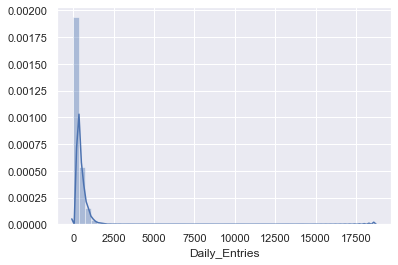

In [122]:
sns.distplot(daily_entries_df['Daily_Entries']
             [daily_entries_df['Daily_Entries'] < 50000])

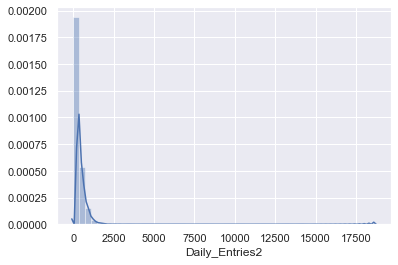

In [126]:
sns.distplot(daily_entries_df['Daily_Entries2']
             [daily_entries_df['Daily_Entries2'] < 30000])

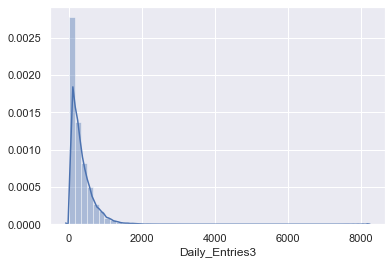

In [125]:
sns.distplot(daily_entries_df['Daily_Entries3']
             [daily_entries_df['Daily_Entries3'] < 10000])

investigate stations that have the same name but different locations

In [ ]:
df_right = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')